In [ ]:
import numpy as np # linear algebra
#import random
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import random
import shutil
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np
import scipy.io as sio
import random
import matplotlib.pyplot as plt
import os
from scipy.io import loadmat
import seaborn as sns
import pandas as pd
import plotly.express as px
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#import shutil
from glob import glob
# Helper libraries
import matplotlib.pyplot as plt
#import math
%matplotlib inline
#print(tf.__version__)

#import shutil
from glob import glob
# Helper libraries
import matplotlib.pyplot as plt
#import math
%matplotlib inline
#print(tf.__version__)

In [ ]:
data_root='C:/Users/Administrator/Desktop/hyperspectral/dataset'
path_changed_cases = os.path.join('C:/Users/Administrator/Desktop/hyperspectral/dataset/changed iamges')
path_normal_cases = os.path.join('C:/Users/Administrator/Desktop/hyperspectral/dataset/normal')

### Datasets Overview 

In [ ]:
# jpg and png files
changed_images_ls = glob(os.path.join(path_changed_cases,"*.jpg"))

normal_images_ls = glob(os.path.join(path_normal_cases,"*.jpg"))
normal_images_ls.extend(glob(os.path.join(path_normal_cases,"*.jpg")))
len(changed_images_ls)


6

In [ ]:
changed = {'class': 'changed',
         'path': path_changed_cases,
         'images': changed_images_ls}

Normal = {'class': 'normal',
             'path': path_normal_cases,
             'images': normal_images_ls}


In [ ]:
def read_HSI():
    X = loadmat('C:/Users/Administrator/Desktop/hyperspectral/Indian_pines.mat')['indian_pines']
    y = loadmat('C:/Users/Administrator/Desktop/hyperspectral/Indian_pines_gt.mat')['indian_pines_gt']
    print(f"X shape:{X.shape}\ny shape: {y.shape}")
    return X,y
X, y = read_HSI()

X shape:(145, 145, 220)
y shape: (145, 145)


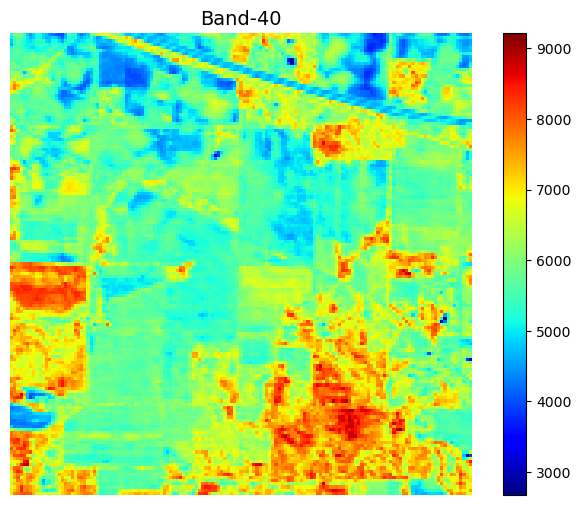

In [ ]:
def plot_band(dataset):
    plt.figure(figsize=(8, 6))
    band_no = 40
    plt.imshow(dataset[:,:, band_no], cmap='jet')
    plt.title(f'Band-{band_no}', fontsize=14)
    plt.axis('off')
    plt.colorbar()
    plt.show()
plot_band(X)

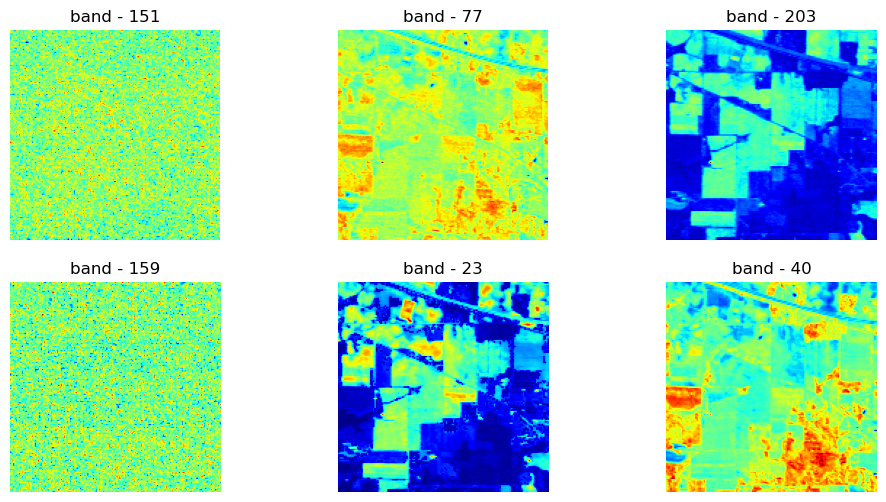

In [ ]:
sns.axes_style('whitegrid')
fig = plt.figure(figsize=(12,6))

for i in range(1,1+6):
    fig.add_subplot(2,3,i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:,:,q],cmap='jet')
    plt.axis('off')
    plt.title(f'band - {q}')

In [ ]:
def extract_pixels(X,y):
    q = X.reshape(-1,X.shape[2])
    df = pd.DataFrame(data=q)
    df = pd.concat([df,pd.DataFrame(data = y.ravel())], axis=1)
    df.columns = [f'band{i}' for i in range(1,1+X.shape[2])]+['class']
    df.to_csv('IndianPines.csv')
    return df
df = extract_pixels(X,y)

In [ ]:
df = pd.read_csv("IndianPines.csv")
df

Unnamed: 0  band1  band2  band3  band4  band5  band6  band7  band8  \
0               0   3172   4142   4506   4279   4782   5048   5213   5106   
1               1   2580   4266   4502   4426   4853   5249   5352   5353   
2               2   3687   4266   4421   4498   5019   5293   5438   5427   
3               3   2749   4258   4603   4493   4958   5234   5417   5355   
4               4   2746   4018   4675   4417   4886   5117   5215   5096   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
21020       21020   2561   3987   4011   4023   4201   4377   4418   4248   
21021       21021   2726   4104   4024   3880   4210   4377   4413   4174   
21022       21022   3153   3864   4282   3889   4310   4372   4375   4208   
21023       21023   3155   4104   4106   4027   4139   4318   4413   4174   
21024       21024   3323   3860   4197   3952   4148   4279   4375   4225   

       band9  ...  band212  band213  band214  band215  band216  band217  \
0       5053  ...     1090     1112     1090     1062     1069     1057   
1       5347  ...     1104     1117     1091     1079     1085     1064   
2       5383  ...     1114     1114     1100     1065     1092     1061   
3       5349  ...     1108     1109     1109     1071     1088     1060   
4       5098  ...     1107     1112     1094     1072     1087     1052   
...      ...  ...      ...      ...      ...      ...      ...      ...   
21020   4180  ...     1012     1018     1015     1011     1001     1000   
21021   4229  ...     1014     1012     1024      998     1010     1006   
21022   4096  ...     1015     1016     1021     1008     1019     1003   
21023   4140  ...     1011     1008     1012     1014     1007     1011   
21024   3988  ...     1014     1007     1015     1002     1010     1007   

       band218  band219  band220  class  
0         1020     1020     1005      3  
1         1029     1020     1000      3  
2         1030     1016     1009      3  
3         1030     1006     1005      3  
4         1034     1019     1019      3  
...        ...      ...      ...    ...  
21020     1009     1008     1009      0  
21021     1000     1000     1004      0  
21022     1008     1000     1009      0  
21023     1005     1003     1004      0  
21024     1004     1000     1000      0  

[21025 rows x 222 columns]

In [ ]:
df.iloc[:,:-1].describe()

Unnamed: 0         band1         band2         band3         band4  \
count  21025.000000  21025.000000  21025.000000  21025.000000  21025.000000   
mean   10512.000000   2957.363472   4091.321237   4277.502259   4169.956671   
std     6069.539041    354.918708    230.390005    257.827640    280.761254   
min        0.000000   2560.000000   2709.000000   3649.000000   2810.000000   
25%     5256.000000   2602.000000   3889.000000   4066.000000   3954.000000   
50%    10512.000000   2780.000000   4106.000000   4237.000000   4126.000000   
75%    15768.000000   3179.000000   4247.000000   4479.000000   4350.000000   
max    21024.000000   4536.000000   5744.000000   6361.000000   6362.000000   

              band5         band6         band7         band8         band9  \
count  21025.000000  21025.000000  21025.000000  21025.000000  21025.000000   
mean    4516.678668   4790.595149   4848.317574   4714.732509   4668.904828   
std      346.035984    414.382138    469.247667    491.728349    533.232855   
min     3840.000000   4056.000000   4004.000000   3865.000000   3775.000000   
25%     4214.000000   4425.000000   4421.000000   4263.000000   4173.000000   
50%     4478.000000   4754.000000   4808.000000   4666.000000   4632.000000   
75%     4772.000000   5093.000000   5198.000000   5100.000000   5084.000000   
max     7153.000000   7980.000000   8284.000000   8128.000000   8194.000000   

       ...       band211       band212       band213       band214  \
count  ...  21025.000000  21025.000000  21025.000000  21025.000000   
mean   ...   1061.927848   1060.210273   1063.276813   1050.048514   
std    ...     38.843805     38.712195     41.920969     34.242725   
min    ...    998.000000    999.000000    999.000000    993.000000   
25%    ...   1026.000000   1024.000000   1024.000000   1019.000000   
50%    ...   1053.000000   1052.000000   1054.000000   1043.000000   
75%    ...   1099.000000   1098.000000   1104.000000   1083.000000   
max    ...   1287.000000   1289.000000   1315.000000   1258.000000   

            band215       band216       band217       band218       band219  \
count  21025.000000  21025.000000  21025.000000  21025.000000  21025.000000   
mean    1040.201141   1043.370321   1030.194816   1015.571463   1008.513579   
std       26.452672     29.794418     20.865106     11.386402      7.050921   
min      990.000000    992.000000    989.000000    986.000000    981.000000   
25%     1016.000000   1016.000000   1012.000000   1006.000000   1004.000000   
50%     1033.000000   1035.000000   1026.000000   1014.000000   1009.000000   
75%     1066.000000   1072.000000   1050.000000   1024.000000   1014.000000   
max     1201.000000   1245.000000   1167.000000   1076.000000   1036.000000   

            band220  
count  21025.000000  
mean    1006.791011  
std        6.995153  
min      980.000000  
25%     1003.000000  
50%     1005.000000  
75%     1010.000000  
max     1034.000000  

[8 rows x 221 columns]

In [ ]:
pca = PCA(n_components = 3)
dt = pca.fit_transform(df.iloc[:, :-1].values)
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y.ravel())], axis = 1)
q.columns = [f'PC-{i}' for i in range(1,4)]+['class']

q.to_csv('IndianPines_.csv',index=False)

qq = q[q['class']!=0]
qq['class'].value_counts()

11    2455
2     1428
14    1265
10     972
3      830
6      730
12     593
5      483
8      478
15     386
4      237
13     205
16      93
1       46
7       28
9       20
Name: class, dtype: int64

In [ ]:
class_labels = {'1':'Alfaalfa','2':'Corn-notill','3':'Corn-mintill','4':'Corn','5':'Grass/pasture','6':'Grass/trees','7':'Grass/pasture-mowed','8':'Hay-windrowed','9':'Oats','10':'Soyabean-notill','11':'Soyabean-mintill','12':'Soyabean-clean','13':'Wheat','14':'Woods','15':'Building-grass-trees-drives','16':'Stone-steel towers'}

In [ ]:
qq['label'] = qq['class'].apply(lambda x:class_labels[str(x)])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5740\4027579163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qq['label'] = qq['class'].apply(lambda x:class_labels[str(x)])


In [ ]:
qq['label'].value_counts()

Soyabean-mintill               2455
Corn-notill                    1428
Woods                          1265
Soyabean-notill                 972
Corn-mintill                    830
Grass/trees                     730
Soyabean-clean                  593
Grass/pasture                   483
Hay-windrowed                   478
Building-grass-trees-drives     386
Corn                            237
Wheat                           205
Stone-steel towers               93
Alfaalfa                         46
Grass/pasture-mowed              28
Oats                             20
Name: label, dtype: int64

In [ ]:
count = qq['class'].value_counts()
bar_fig = px.bar(x=count.index[1:],y = count[1:], labels=class_labels, color = count.index[1:])
bar_fig.update_layout(
        xaxis = dict(
            title='Class',
            tickmode='array',
            tickvals= count.index[1:].tolist(),
            tickangle = 45
        ),
        yaxis = dict(
            title='count',
        ),
          showlegend = False
)
bar_fig.show()

In [ ]:
sample_size = 10
sample = qq.groupby('class').apply(lambda x: x.sample(sample_size))
sample.head()

PC-1         PC-2         PC-3  class     label
class                                                             
1     9811  -286.819969  -534.655201 -1371.319088      1  Alfaalfa
      10251  339.598006  -466.720232 -2129.249060      1  Alfaalfa
      10686  573.239308  -159.438825 -1565.428938      1  Alfaalfa
      10248  197.587032  -470.557777 -1275.169086      1  Alfaalfa
      10104  322.218083 -1134.181597  -435.138739      1  Alfaalfa

In [ ]:
scatter_3d = px.scatter_3d(sample, x="PC-1", y="PC-2", z="PC-3", color="label", size="class", hover_name="label",symbol="label")
scatter_3d.show()


In [ ]:
pair = px.scatter_matrix(sample, dimensions=["PC-1", "PC-2", "PC-3"], color="label")
pair.show()


In [ ]:
fig = px.scatter(sample, x="PC-1", y="PC-2", size="class", color="label",
           hover_name="label", log_x=True, size_max=12)
fig.show()

In [ ]:
fig = fig = px.violin(sample, y="PC-1", x="PC-2", color="label", box=True, points="all", 
                      hover_data=['PC-1', 'PC-2', 'PC-3','label'])
fig.show()

In [ ]:
total_changed_= len(changed_images_ls)
total_normal_= len(normal_images_ls)
print("Total brain tumour images: {}".format(total_changed_))
print("Total brain normal images: {}".format(total_normal_))


Total brain tumour images: 6
Total brain normal images: 8


In [ ]:
# Create Train-Test Directory
subdirs  = ['train/', 'test/']
for subdir in subdirs:
    labeldirs = ['changed images', 'Normal']
    for labldir in labeldirs:
        newdir = subdir + labldir
        os.makedirs(newdir, exist_ok=True)
        print(newdir)

train/changed images
train/Normal
test/changed images
test/Normal


In [ ]:
total_train_changed = len(os.listdir('C:/Users/Administrator/Desktop/hyperspectral/dataset/changed iamges'))
total_train_normal = len(os.listdir('C:/Users/Administrator/Desktop/hyperspectral/dataset/normal'))
total_test_changed = len(os.listdir('C:/Users/Administrator/Desktop/hyperspectral/dataset/changed iamges'))
total_test_normal = len(os.listdir('C:/Users/Administrator/Desktop/hyperspectral/dataset/normal'))

print("Train sets images tumour: {}".format(total_train_changed))
print("Train sets images normal: {}".format(total_train_normal))
print("Test sets images tumour: {}".format(total_test_changed))
print("Test sets images normal: {}".format(total_test_normal))

Train sets images tumour: 7
Train sets images normal: 4
Test sets images tumour: 7
Test sets images normal: 4


CNN MODEL

In [ ]:
batch_size =55
epochs = 22
IMG_HEIGHT = 224
IMG_WIDTH =224

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
test_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [ ]:
batch_size =2
epochs = 22
IMG_HEIGHT = 224
IMG_WIDTH = 224
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(2, 2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
        
])

In [ ]:
train_dir = os.path.join('C:/Users/Administrator/Desktop/hyperspectral/dataset')
test_dir = os.path.join('C:/Users/Administrator/Desktop/hyperspectral/dataset')


total_train = total_train_changed + total_train_normal
total_test = total_test_changed + total_test_normal

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 11 images belonging to 2 classes.


In [ ]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 11 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])



In [ ]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(2, 2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
        
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 64)      

In [ ]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=total_test // batch_size
)

Epoch 1/22
5/5 [==============================] - 4s 741ms/step - loss: 0.2844 - accuracy: 0.7778 - val_loss: 0.1183 - val_accuracy: 1.0000
Epoch 2/22
5/5 [==============================] - 4s 849ms/step - loss: 0.0601 - accuracy: 1.0000 - val_loss: 0.2894 - val_accuracy: 0.9000
Epoch 3/22
5/5 [==============================] - 4s 805ms/step - loss: 0.4117 - accuracy: 0.9000 - val_loss: 0.0929 - val_accuracy: 1.0000
Epoch 4/22
5/5 [==============================] - 4s 781ms/step - loss: 0.0864 - accuracy: 0.8889 - val_loss: 0.0634 - val_accuracy: 1.0000
Epoch 5/22
5/5 [==============================] - 4s 797ms/step - loss: 0.0464 - accuracy: 1.0000 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 6/22
5/5 [==============================] - 4s 813ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 7/22
5/5 [==============================] - 4s 717ms/step - loss: 4.9518e-04 - accuracy: 1.0000 - val_loss: 4.0239e-04 - val_accuracy: 1.0000
Epoch 8/22
5

In [ ]:

from __future__ import print_function, division

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam


import matplotlib.pyplot as plt

import sys

import numpy as np

class GAN():
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)


    def build_generator(self):

        model = Sequential()

        model.add(Dense(256, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(self.img_shape), activation='tanh'))
        model.add(Reshape(self.img_shape))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Flatten(input_shape=self.img_shape))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128, sample_interval=50):

        # Load the dataset
        (X_train, _), (_, _) = mnist.load_data()

        # Rescale -1 to 1
        X_train = X_train / 127.5 - 1.
        X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Generate a batch of new images
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch(noise, valid)

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        
        plt.close()


if __name__ == '__main__':
    gan = GAN()
    gan.train(epochs=30000, batch_size=32, sample_interval=200)


Streaming output truncated to the last 5000 lines.
25000 [D loss: 0.655982, acc.: 62.50%] [G loss: 1.022145]
25001 [D loss: 0.561323, acc.: 62.50%] [G loss: 0.979699]
25002 [D loss: 0.675290, acc.: 56.25%] [G loss: 1.065420]
25003 [D loss: 0.634888, acc.: 64.06%] [G loss: 1.050957]
25004 [D loss: 0.715098, acc.: 51.56%] [G loss: 0.991165]
25005 [D loss: 0.763256, acc.: 45.31%] [G loss: 1.002755]
25006 [D loss: 0.644601, acc.: 62.50%] [G loss: 0.932908]
25007 [D loss: 0.665864, acc.: 65.62%] [G loss: 0.870123]
25008 [D loss: 0.537083, acc.: 79.69%] [G loss: 0.948929]
25009 [D loss: 0.631114, acc.: 64.06%] [G loss: 0.929378]
25010 [D loss: 0.603551, acc.: 67.19%] [G loss: 0.945850]
25011 [D loss: 0.614427, acc.: 71.88%] [G loss: 1.017728]
25012 [D loss: 0.597963, acc.: 73.44%] [G loss: 0.923224]
25013 [D loss: 0.568490, acc.: 71.88%] [G loss: 1.040092]
25014 [D loss: 0.641976, acc.: 54.69%] [G loss: 0.937005]
25015 [D loss: 0.660927, acc.: 62.50%] [G loss: 0.944775]
25016 [D loss: 0.6547

In [ ]:
import pickle
pickle.dump(GAN, open('model.pkl','wb'))

In [ ]:
history = model.history.history


In [ ]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    plt.figure()

    # Loss
    

    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
   
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
 
    plt.show()


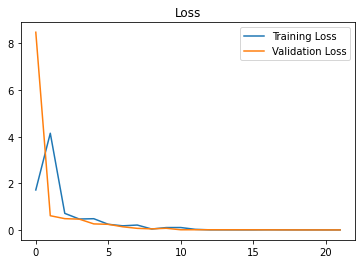

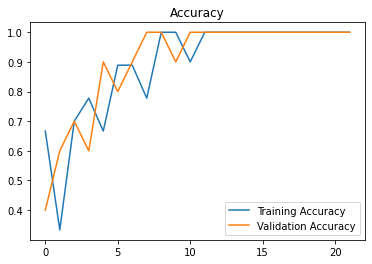

In [ ]:
plot_metrics(history)

1/1 [==============================] - 0s 293ms/step
[[-4093.398]]
changed


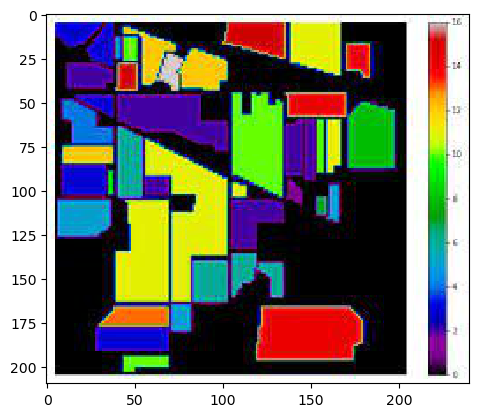

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
img=mpimg.imread('C:/Users/Administrator/Desktop/hyperspectral/dataset/changed iamges/download (1).jpg')
imgplot = plt.imshow(img, interpolation='none')

test_image = image.load_img('C:/Users/Administrator/Desktop/hyperspectral/dataset/changed iamges/download (1).jpg', target_size = (224, 224))
#C:\Users\HP\Desktop\covid 19\dataset\normal

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(result)
if result>=1:
    print( 'normal')
else:
    print( 'changed')
#Building and training a Logistic Regression model

    

In [ ]:
model.save_weights("model_hyper.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
model_json=model.to_json()
with open("model_hyper.json", "w") as json_file:
    json_file.write(model_json)